In [72]:
import os
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import numpy as np
import pandas as pd
import pymongo

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from helpers import connect_to_db, decontracted, display_topics

In [2]:
client = connect_to_db()
db = client.accounts # connect to my database

posts = db['posts'] # collection of posts

In [33]:
cursor = posts.find()
entries = list(cursor)

df = pd.DataFrame(entries)

In [5]:
analyser = SentimentIntensityAnalyzer()

In [6]:
analyser.polarity_scores('everything is great!')

{'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'compound': 0.6588}

In [224]:
df.sort_values(by=['day'], ascending=False)

,_id,account,post_id,likes,comments,date,content,hashtags,number_hashtags,img_text,number_emojis,mentions,emoji_terms,pre_cleaned_text,url_email,all_content,sentiment,year,month,day
9630,5f383fab9ff725ae35d78a76,dr.alexandra.solomon,BsEZFx5HQlU,162,8,2018-12-31 17:33:47,"If you love New Year's Resolutions, go for it!...",,0,HOW LONG WILL YOU KEEP YOUR NEW YEAR'S RESOLUT...,0.0,,,"If you love New Year is Resolutions, go for it...",,"If you love New Year's Resolutions, go for it!...",-0.7381,2018,12,31
11584,5f3846d69ff725ae35d7921a,findmywellbeing,Bvq5dr0lY2I,188,4,2019-03-31 07:02:00,"Bring on the mistakes. \n_\nOkay, that's not h...",talktherapy mywellbeing speakout wellnessthatw...,24,A PERSON WHO NEVER MADE A EE 4a ea TRIED ANYTH...,2.0,,revolving hearts speech balloon,"Bring on the mistakes. Okay, that is not how I...",,"Bring on the mistakes. \n_\nOkay, that's not h...",0.9851,2019,3,31
12810,5f384d2b9ff725ae35d796e7,lizlistens,BtTnU3UH4W7,442,49,2019-01-31 11:58:11,"When in conflict, we respond in one of three w...",,0,PASSIVE: “| WILL SUFFER SO YOU DON’T” AGGRESSI...,2.0,,backhand index pointing down medium light skin...,"When in conflict, we respond in one of three w...",,"When in conflict, we respond in one of three w...",-0.9711,2019,1,31
3520,5f3472968091264adc7b49e2,mindfulmft,Bl6Tx2EAY6L,5167,48,2018-07-31 17:26:37,"What’s it going to be, friends? Lean in or lea...",,0,Soa ua ele tae wet) a Not doing anything is a ...,0.0,,,"What is it going to be, friends? Lean in or le...",,"What’s it going to be, friends? Lean in or lea...",0.8555,2018,7,31
11519,5f38469d9ff725ae35d791d9,findmywellbeing,BtTF5ENDSg0,286,15,2019-01-31 07:06:02,"In a @bazaaruk piece last week, Prince William...",anxietyrelief therapyiscool mentalhealth thera...,13,Tam olonKon Ke) maycelean : health and 7 vcd O...,2.0,bazaaruk,speaking head hundred points,"In a piece last week, Prince William shared, F...",,"In a @bazaaruk piece last week, Prince William...",-0.7792,2019,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,5f3473b18091264adc7b50c5,seerutkchawla,ByLEkYzgvZs,41,4,2019-06-01 11:57:31,#integration #wholeself #traumahealing #recove...,nostigma depressionawareness authenticity whol...,25,"IT’S BETTER FOR YOU TO BE OPENLY VULNERABLE, T...",0.0,,,,,#integration #wholeself #traumahealing #recove...,0.5106,2019,6,1
5275,5f3473b08091264adc7b50c4,mindfulmft,ByLDne2FltM,1344,50,2019-06-01 11:52:35,"Our friend, @longdistancelovebombs, wrote and ...",,0,,1.0,longdistancelovebombs,yellow heart,"Our friend, , wrote and performed his spoken w...",,"Our friend, @longdistancelovebombs, wrote and ...",0.9349,2019,6,1
5274,5f3473b08091264adc7b50c3,seerutkchawla,ByLA3_Agt64,31,8,2019-06-01 11:25:14,"; you and I. We could have stopped, but we cho...",nostigma depressionawareness suicide semicolon...,20,THE BRAVEST GODDAMN Sth goed — ~@SEERUTKCHAWLA,2.0,,red heart,"; you and I. We could have stopped, but we cho...",,"; you and I. We could have stopped, but we cho...",0.9288,2019,6,1
5273,5f3473b08091264adc7b50c2,seerutkchawla,ByK63GnADkj,17,0,2019-06-01 10:32:42,From @mastinkipp #trauma #traumainformed #trau...,learning mindfulparenting psychoeducation pare...,9,Reaching the Learning Brain Dr Bruce Perry’s 3...,0.0,mastinkipp,,From,,From @mastinkipp #trauma #traumainformed #trau...,0.9698,2019,6,1


In [225]:
df['all_content'] = df.apply(lambda post: post['content'], axis=1)

In [226]:
df['all_content'].isna().sum()

0

In [227]:
df['all_content']

0        #therapy #positivequotes #quotes #marriage #re...
1        #motivation #love #power #encourage #journey #...
2        #storms #accomplishments #roots #strength #liv...
3        #words #self #life #MINDFULMFT #mindfulness #c...
4        #truth #wisdom #wise #think #act #motivation #...
                               ...                        
14834    i’m so excited to share my collaboration with ...
14835                       speak it out loud loves! 🗣🗣🗣\n
14836       here’s to a weekend with some time for you x\n
14837    Because self-care is community care.\n—•\nComm...
14838    #AD - During this time of collective healing, ...
Name: all_content, Length: 14839, dtype: object

In [228]:
df['sentiment'] = df['all_content'].apply(lambda post: analyser.polarity_scores(post)['compound'])

In [250]:
df.to_csv("../data/cleaned_text.csv")

In [229]:
df.groupby(by='account')['sentiment'].mean()

account
alyssamariewellness          0.161461
dr.alexandra.solomon         0.667879
dr.marielbuque               0.601201
findmywellbeing              0.613871
heydrjustine                 0.608578
lauraandersontherapy        -0.033903
lizlistens                   0.471072
millennial.therapist         0.413731
minaa_b                      0.428229
mindfulmft                   0.699007
nedratawwab                  0.431737
risingwoman                  0.672980
seerutkchawla                0.196278
sitwithwhit                  0.428174
the.holistic.psychologist    0.383063
thebraincoach                0.365424
themindgeek                  0.705673
yasminecheyenne              0.483982
Name: sentiment, dtype: float64

In [144]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)

In [230]:
sentiment_by_year_account = df.groupby(by=['account', 'year'])['sentiment'].median().reset_index()

In [231]:
df.groupby(by=['account', 'year', 'day'])['sentiment'].median().reset_index()

,account,year,day,sentiment
0,alyssamariewellness,2017,2,0.9888
1,alyssamariewellness,2017,6,0.9792
2,alyssamariewellness,2017,18,0.7736
3,alyssamariewellness,2017,28,-0.3612
4,alyssamariewellness,2018,11,0.5859
...,...,...,...,...
1879,yasminecheyenne,2020,27,0.7236
1880,yasminecheyenne,2020,28,0.6868
1881,yasminecheyenne,2020,29,0.8079
1882,yasminecheyenne,2020,30,0.5896


In [251]:
df.groupby(by=['account', 'year', 'day'])['sentiment'].mean().reset_index()

,account,year,day,sentiment
0,alyssamariewellness,2017,2,0.988800
1,alyssamariewellness,2017,6,0.979200
2,alyssamariewellness,2017,18,0.773600
3,alyssamariewellness,2017,28,-0.361200
4,alyssamariewellness,2018,11,0.585900
...,...,...,...,...
1879,yasminecheyenne,2020,27,0.478343
1880,yasminecheyenne,2020,28,0.653460
1881,yasminecheyenne,2020,29,0.352460
1882,yasminecheyenne,2020,30,0.582817


In [232]:
sentiment_by_year_account

,account,year,sentiment
0,alyssamariewellness,2017,0.87640
1,alyssamariewellness,2018,0.64775
2,alyssamariewellness,2019,0.00000
3,alyssamariewellness,2020,0.00000
4,dr.alexandra.solomon,2015,0.83300
...,...,...,...
67,themindgeek,2018,0.52670
68,themindgeek,2019,0.96090
69,themindgeek,2020,0.96460
70,yasminecheyenne,2019,0.57510


In [248]:
since_2018 = sentiment_by_year_account[((sentiment_by_year_account['year'] > 2017))]

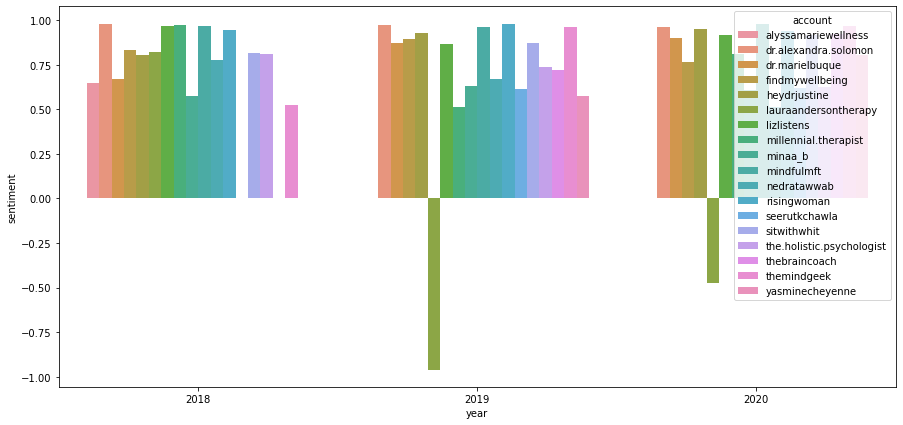

In [249]:
plt.figure(figsize=(15, 7))
#plt.xticks(rotation=45, ha='right')
sns.barplot(x='year', y='sentiment', hue='account', data=since_2018, );

In [235]:
sentiment_by_year_account#.groupby(by='account')['year'].count().sort_values()

,account,year,sentiment
0,alyssamariewellness,2017,0.87640
1,alyssamariewellness,2018,0.64775
2,alyssamariewellness,2019,0.00000
3,alyssamariewellness,2020,0.00000
4,dr.alexandra.solomon,2015,0.83300
...,...,...,...
67,themindgeek,2018,0.52670
68,themindgeek,2019,0.96090
69,themindgeek,2020,0.96460
70,yasminecheyenne,2019,0.57510


In [218]:
#df['years_active'] = 
df.groupby(by=['account', 'year'])['post_id'].count().reset_index().apply(lambda x: np.where(x['post_id'] > 200, "active", "inactive"), axis=1)

0     inactive
1     inactive
2       active
3       active
4     inactive
        ...   
67    inactive
68    inactive
69    inactive
70      active
71    inactive
Length: 72, dtype: object

In [217]:
df.groupby(by=['account', 'year'])['day'].count().reset_index()

,account,year,day
0,alyssamariewellness,2017,4
1,alyssamariewellness,2018,2
2,alyssamariewellness,2019,345
3,alyssamariewellness,2020,216
4,dr.alexandra.solomon,2015,82
...,...,...,...
67,themindgeek,2018,1
68,themindgeek,2019,170
69,themindgeek,2020,120
70,yasminecheyenne,2019,306
